<a href="https://colab.research.google.com/github/kingajutrzenka/ML-Bootcamp-I/blob/main/Regresja%20wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresja wielomianowa**

# *Import*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set()

In [3]:

def set_gothic_lilac_theme():
    """Presentation style – Gothic Lilac Palette"""
    palette = ["#080d10",  # Raven Black
               "#571947",  # Gothic Plum
               "#4e3559",  # Faded Iris
               "#9166a6",  # Royal Lilac
               "#c8bbe9"]  # Soft Lilac

    sns.set_theme(
        style="whitegrid",
        rc={
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.titlesize": 14,
            "axes.labelsize": 12,
            "grid.alpha": 0.2,
            "figure.dpi": 120,
            "savefig.dpi": 150,
        }
    )
    sns.set_palette(palette)
    return palette

# set style
palette = set_gothic_lilac_theme()


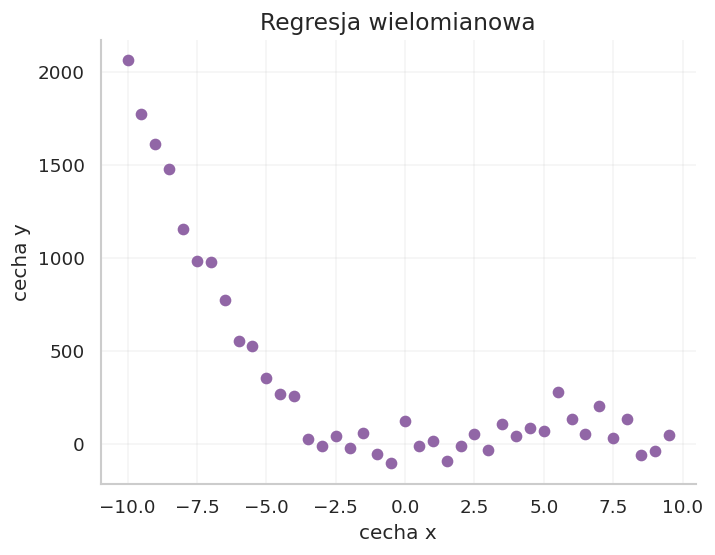

In [4]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise # nasz model
X = X.reshape(40, 1)

plt.figure()
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('cecha y')
plt.scatter(X, y, label='cecha x', color=palette[3])
plt.show()

# *Linear model*

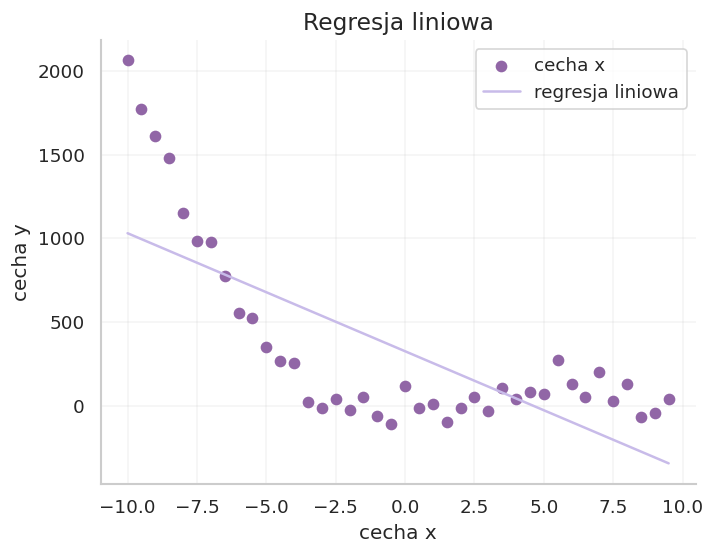

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure()
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('cecha y')
plt.scatter(X, y, label='cecha x', color=palette[3])
plt.plot(X, y_pred_lin, label='regresja liniowa', color=palette[4])
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

# *Polynomial model*

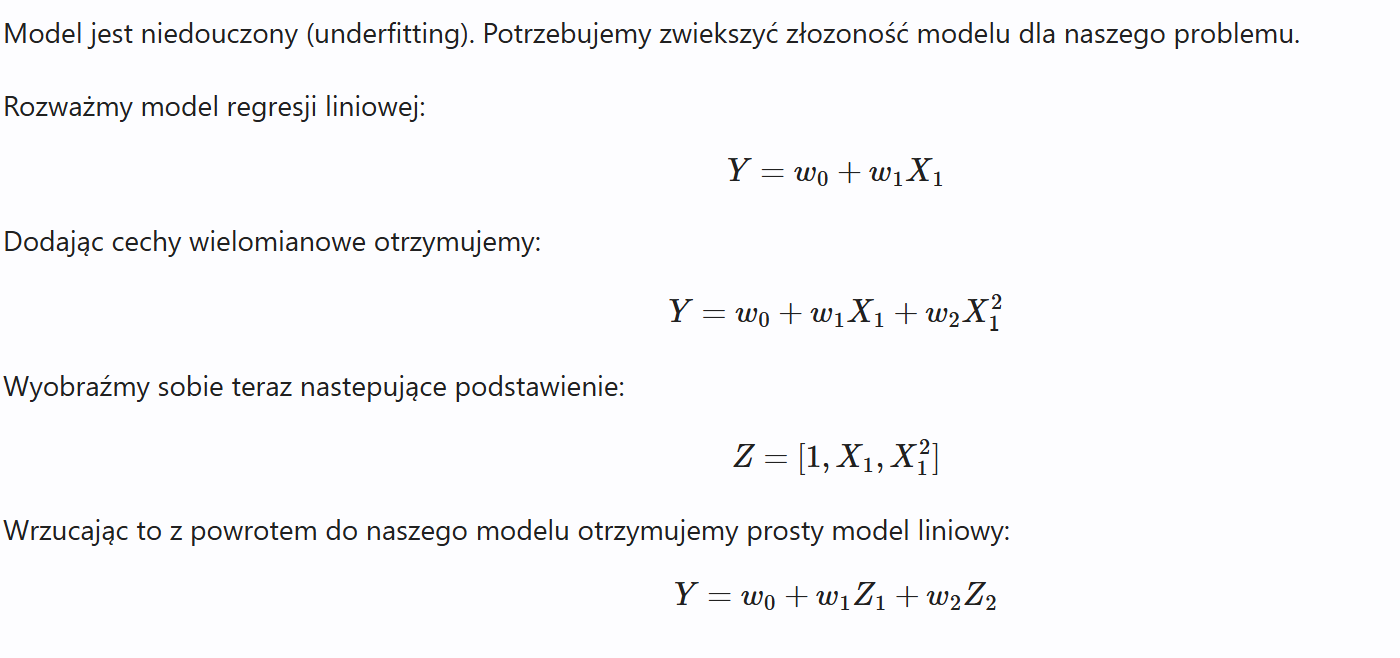

In [9]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly
# 3 bo do X^2

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [11]:
X_poly.shape

(40, 3)

In [12]:
df = pd.DataFrame(data=X_poly)
df.columns = ['1', 'x', 'x^2']
df.head()

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


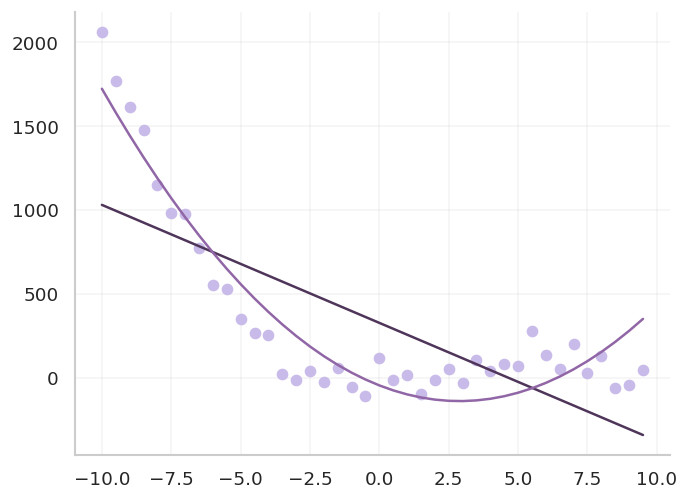

In [13]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure()
plt.scatter(X, y, color=palette[4])
plt.plot(X, y_pred_lin, color=palette[2])
plt.plot(X, y_pred_2, color=palette[3])
plt.show()

In [14]:
r2_score(y, y_pred_2)

0.8951163003458433

# Polynomial model 3 degree

In [15]:
poly = PolynomialFeatures(degree=3)
X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

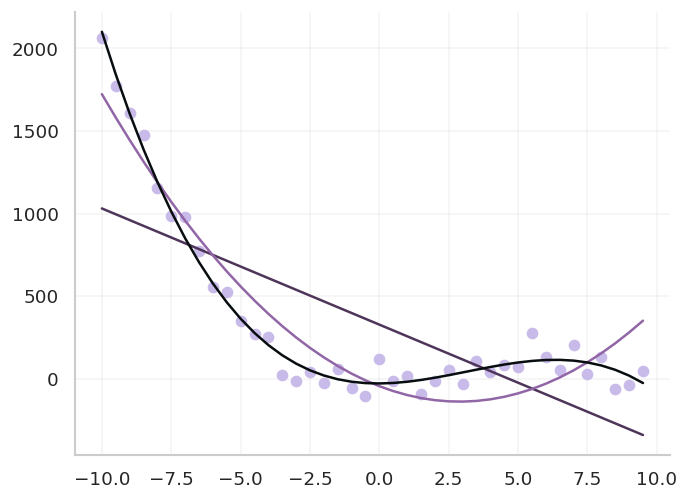

In [18]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure()
plt.scatter(X, y, color=palette[4])
plt.plot(X, y_pred_lin, color=palette[2])
plt.plot(X, y_pred_2, color=palette[3])
plt.plot(X, y_pred_3, color=palette[0])
plt.show()

In [17]:
r2_score(y, y_pred_3)

0.9841708613657418

# *Comparision of metrics*

In [19]:
from sklearn.metrics import mean_squared_error as mae
from sklearn.metrics import mean_squared_error as mse

In [28]:
results = pd.DataFrame(data={
    'name': ['Linear', 'Quadratic', 'Cubic'], # cubic = sześcienny
    'r2': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
})
results

,name,r2,mae,mse,rmse
0,Linear,0.534282,143775.153332,143775.153332,379.176942
1,Quadratic,0.895116,32379.421866,32379.421866,179.942829
2,Cubic,0.984171,4886.730343,4886.730343,69.905152


In [29]:
px.bar(results, x='name', y='r2', color='name', title='R2 score', labels={'name': 'Model', 'r2': 'R2 score'}, color_discrete_sequence=palette)

In [30]:
px.bar(results, x='name', y='mae', color='name', title='MAE score', labels={'name': 'Model', 'mae': 'MAE score'}, color_discrete_sequence=palette)

In [31]:
px.bar(results, x='name', y='rmse', color='name', title='RMSE score', labels={'name': 'Model', 'rmse': 'RMSE score'}, color_discrete_sequence=palette)

In [33]:
px.bar(results, x='name', y='mse', color='name', color_discrete_sequence=palette)